<a href="https://colab.research.google.com/github/Paolo20224/Prueba/blob/main/Titanic_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = "/content/drive/MyDrive/clase data science/titanic.csv"

In [ ]:
df = pd.read_csv(filename)
df.head()
#Muestra la cabecera de la trama de datos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#¿Cuál es el porcentaje de personas que sobrevivió? (pista: encuentra la media de la columna de supervivencia)
#el 38,4% de pasajeros sobrevivió.

df['Survived'].mean()

0.3838383838383838

In [ ]:
#¿Cuántos de cada sexo sobrevivieron?
#233 mujeres sobrevivieron, 109 hombres.

df1=df.groupby(['Sex'])[['Survived']].sum()
df1

,Survived
Sex,
female,233
male,109


In [ ]:
df2=df.groupby(['Sex'])[['Survived']].mean()

In [ ]:
#¿Cuál es el porcentaje de gente que sobrevivió que pagó un pasaje de menos de 10?

df3 =df[['Survived','Fare']]

fare_filter = df3['Fare']<10
df3 = df3.loc[fare_filter, :]
df3

#336 personas pagaron una tarifa menor a 10

,Survived,Fare
0,0,7.2500
2,1,7.9250
4,0,8.0500
5,0,8.4583
12,0,8.0500
...,...,...
877,0,7.8958
878,0,7.8958
881,0,7.8958
884,0,7.0500


In [ ]:
survided_filter = df3['Survived']==1
df4 = df3.loc[fare_filter & survided_filter, :]
df4

#sobrevivieron 67 personas, 67/336 20% sobrevivieron de las que pagaron menos de 10.

,Survived,Fare
2,1,7.9250
19,1,7.2250
22,1,8.0292
28,1,7.8792
32,1,7.7500
...,...,...
804,1,6.9750
821,1,8.6625
828,1,7.7500
855,1,9.3500


In [ ]:
#¿Cuál es la edad promedio de quienes no sobrevivieron?
survived_filter2 = df['Survived']==0
df5 = df.groupby(['Survived'])[['Age']].mean()

In [ ]:
df5
#la edad promedio se quienes no sobrevivieron (0) es 31 años y de quienes sobrevivieron 28 años.

,Age
Survived,
0,30.626179
1,28.343690


In [ ]:
#¿Cuál es la edad promedio de quienes sobrevivieron y no sobrevivieron agrupados por sexo?

df6 = df.groupby(['Survived','Sex'])[['Age']].mean()
df6

Age
Survived Sex              
0        female  25.046875
         male    31.618056
1        female  28.847716
         male    27.276022

In [ ]:
# De quienes sobrevivieron (1); la edad promedio de las mujeres fue 29 y hombres 27.
# De quienes no sobrevivieron (0); la edad promedio de mujeres fue 25 y hombres 31.

Correlacion de variables


In [ ]:
import pandas as pd

corr_df = df.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
df2=df
df2=df2.dropna(subset=["Age"])


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [ ]:
#eliminaremos columna Cabin ya que no es relevante para la predicción y contiene muchos NA

df2 = df2.drop(columns=['Cabin'])
df2.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S


In [ ]:
df2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [ ]:
#se reemplaza var sex para incluir en el modelo, 0 será male y 1 female
df["Sex"]=df["Sex"].replace("male",0)
df["Sex"]=df["Sex"].replace("female",1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#Preparamos el dataset

X = df[['Fare','Pclass','Parch','Sex']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN

In [ ]:
#Creamos el Modelo

#Realizamos iteraciones para "N° de vecinos" y nos quedamos con el mejor equilibrio para el nivel de precision de test y entrenamiento.

n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.86
[[129  10]
 [ 21  63]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       139
           1       0.86      0.75      0.80        84

    accuracy                           0.86       223
   macro avg       0.86      0.84      0.85       223
weighted avg       0.86      0.86      0.86       223



In [ ]:
#accuracy con edad 66%, sin edad 70%, edad no mejora la presicion del modelo, se mantienen los 891 datos originales. se agrega variable sex, KNN mejora a 86%

Arbol de decision

[[0.55319149 0.44680851]
 [0.96969697 0.03030303]
 [0.87861272 0.12138728]
 [0.87861272 0.12138728]
 [0.08       0.92      ]
 [0.65384615 0.34615385]
 [0.96969697 0.03030303]
 [0.87861272 0.12138728]
 [0.         1.        ]
 [0.87861272 0.12138728]
 [0.         1.        ]
 [0.25       0.75      ]
 [0.         1.        ]
 [0.96969697 0.03030303]
 [0.         1.        ]
 [0.87861272 0.12138728]
 [0.87861272 0.12138728]
 [0.         1.        ]
 [0.         1.        ]
 [0.08       0.92      ]
 [0.         1.        ]
 [0.87861272 0.12138728]
 [0.         1.        ]
 [0.87861272 0.12138728]
 [0.65384615 0.34615385]
 [0.         1.        ]
 [0.96969697 0.03030303]
 [0.85714286 0.14285714]
 [0.74074074 0.25925926]
 [0.87861272 0.12138728]
 [0.96969697 0.03030303]
 [0.87861272 0.12138728]
 [0.96969697 0.03030303]
 [0.43478261 0.56521739]
 [0.65384615 0.34615385]
 [0.96969697 0.03030303]
 [0.29411765 0.70588235]
 [0.65384615 0.34615385]
 [0.25       0.75      ]
 [0.87861272 0.12138728]


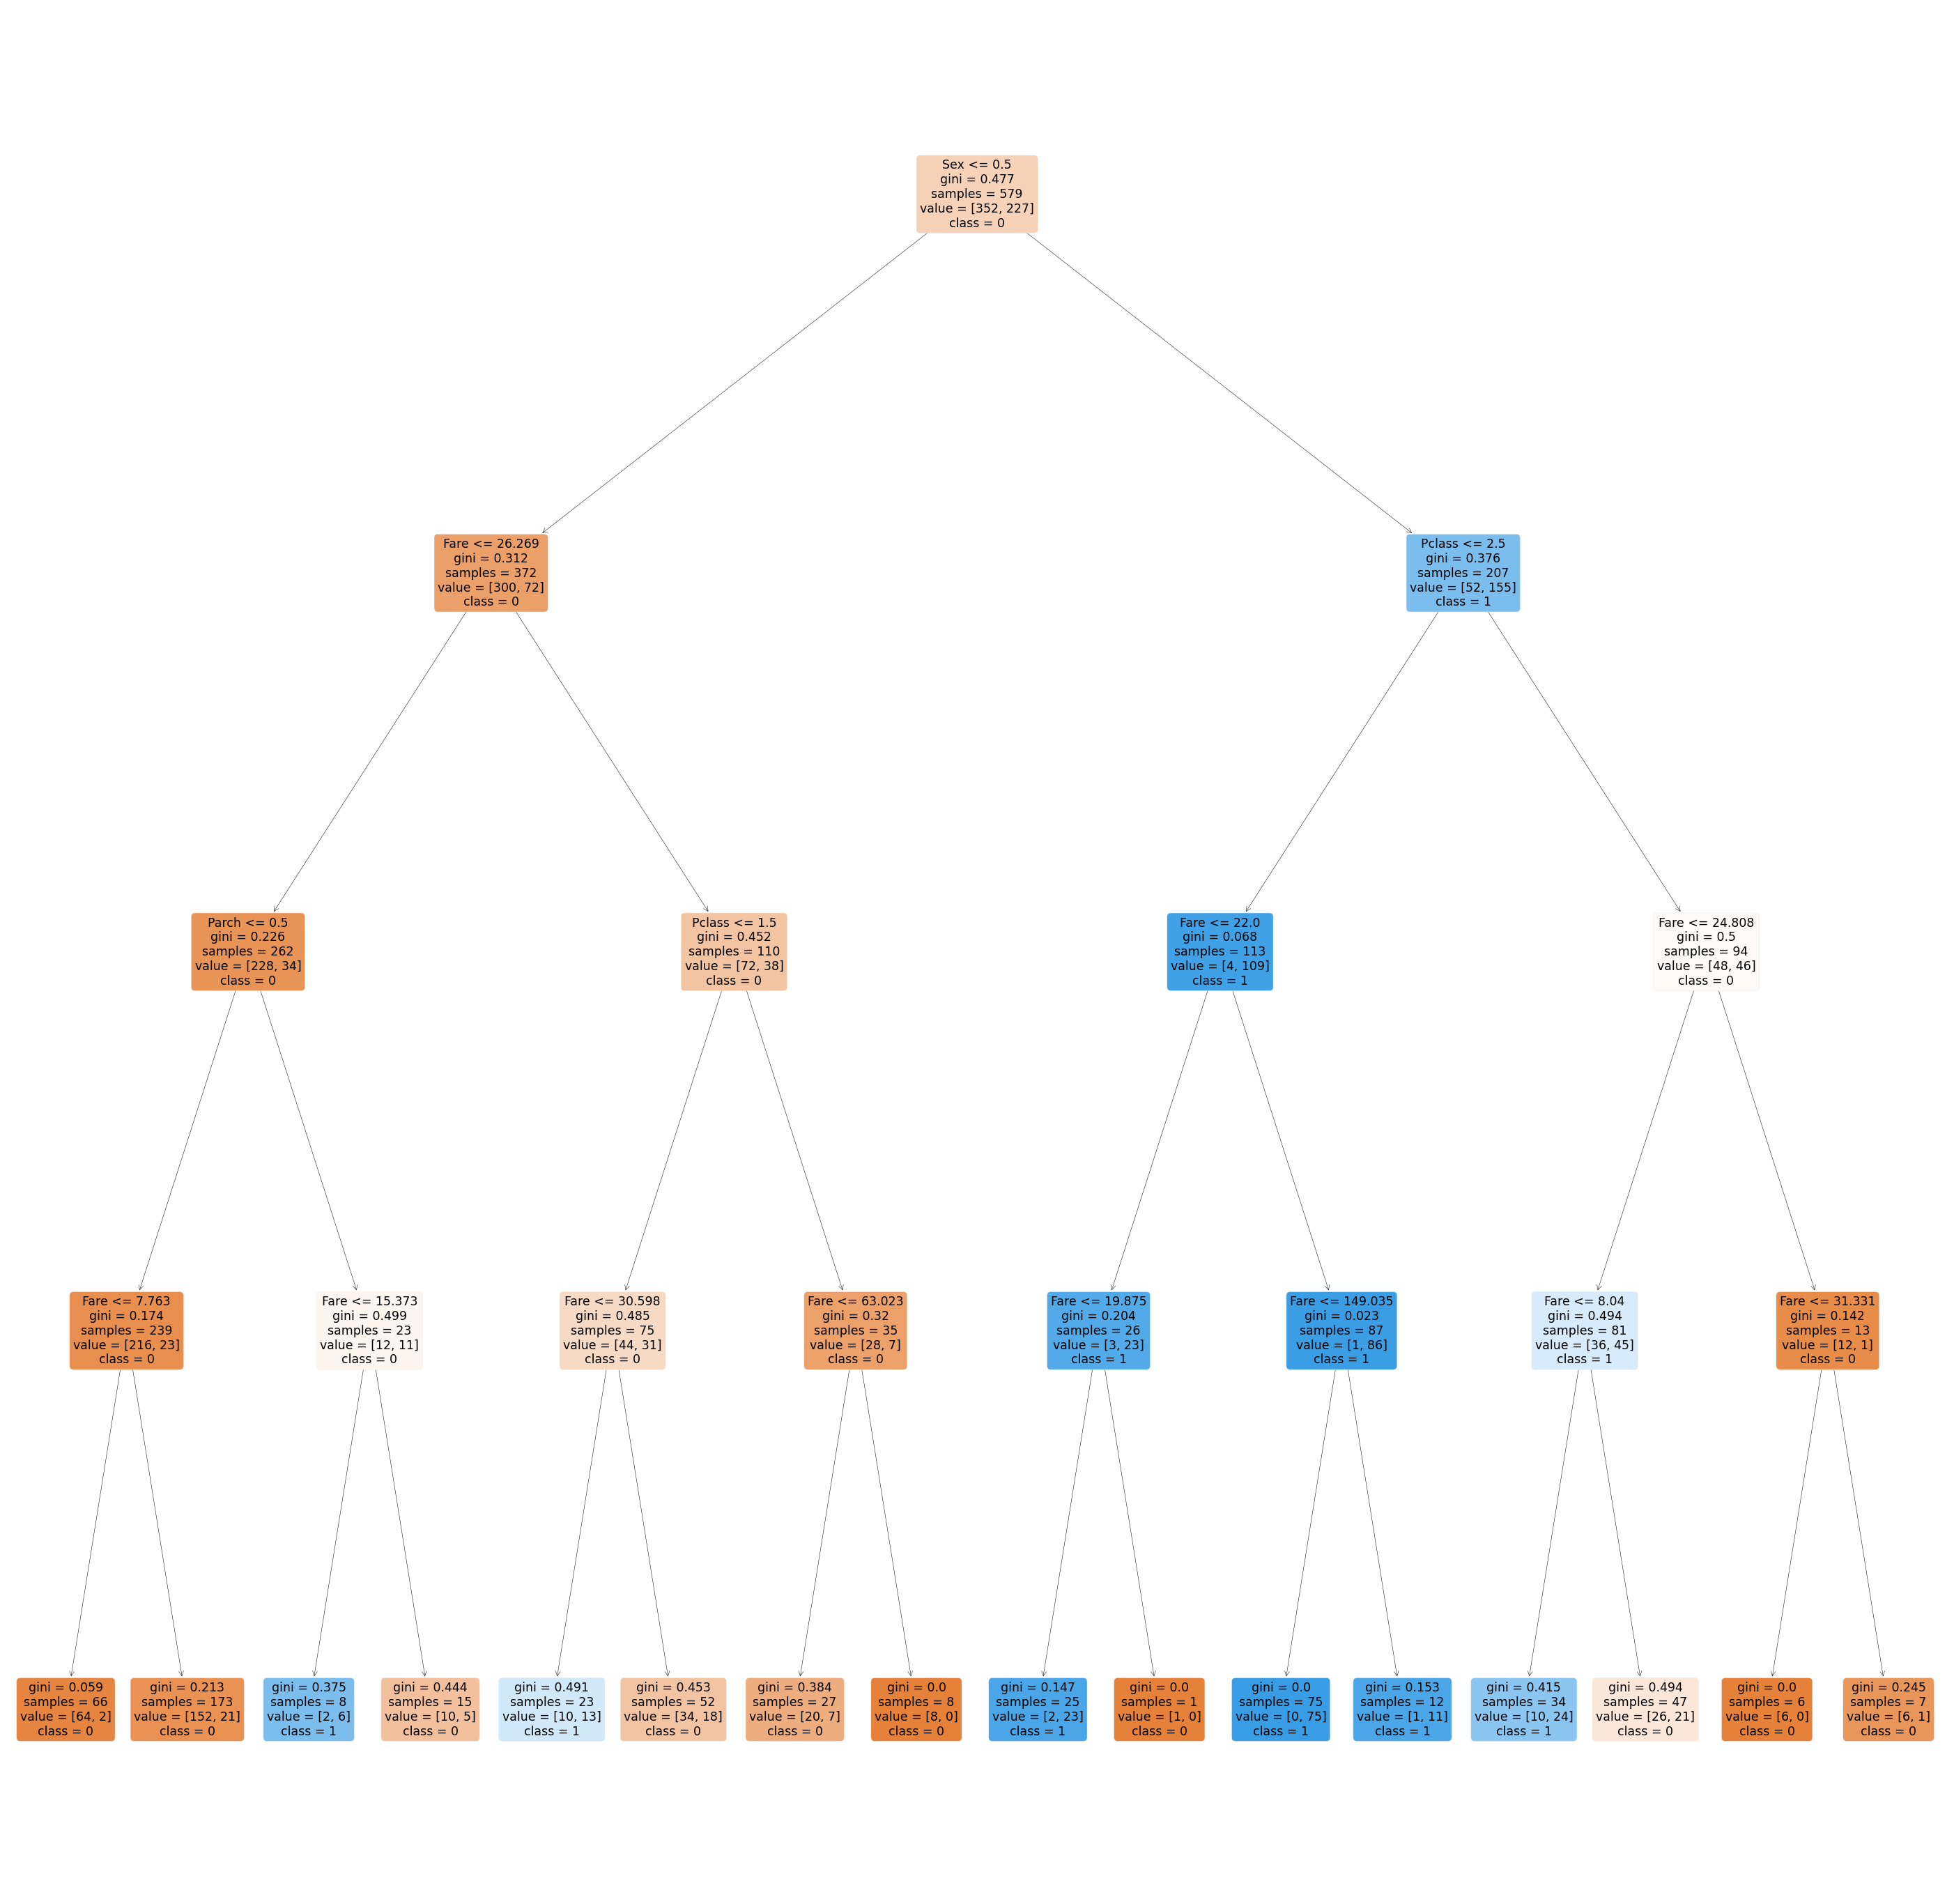

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.35, random_state=20)

tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)
# Visualizando árbol de decisión
plt.figure(figsize=(50,50))
tree.plot_tree(
    tree_clf,
    feature_names=['Fare','Pclass','Parch','Sex'],
    class_names=['0','1'],
    rounded=True,
    filled=True)
# Nueva instancia
# CALCULAMOS LAS Probabilidades por cada clase
print(tree_clf.predict_proba(X_test))
# Clase predicha
pred=tree_clf.predict(X_test)
print("Esta instancia pertenece a la clase",tree_clf.predict(X_test))

In [ ]:
pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[176  21]
 [ 49  66]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       197
           1       0.76      0.57      0.65       115

    accuracy                           0.78       312
   macro avg       0.77      0.73      0.74       312
weighted avg       0.77      0.78      0.77       312



 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rndf_clf = RandomForestClassifier(n_estimators=2)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_test)

pred = rndf_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

rndf_clf.score(X_test, y_test)

[[171  26]
 [ 41  74]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       197
           1       0.74      0.64      0.69       115

    accuracy                           0.79       312
   macro avg       0.77      0.76      0.76       312
weighted avg       0.78      0.79      0.78       312



0.7852564102564102

# **Regresión Logística P1**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Entrenamiento regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

log_reg.score(X_test, y_test)

[[164  33]
 [ 37  78]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       197
           1       0.70      0.68      0.69       115

    accuracy                           0.78       312
   macro avg       0.76      0.76      0.76       312
weighted avg       0.77      0.78      0.77       312



0.7756410256410257

## **Regresión logística P2**

In [ ]:
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-7,1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10,20,40, 100,200,500,1000]
space['class_weight']=[{ 0:0.6, 1:0.4 }]
space



{'solver': ['newton-cg', 'lbfgs', 'liblinear'],
 'penalty': ['none', 'l1', 'l2', 'elasticnet'],
 'C': [1e-07,
  1e-06,
  1e-05,
  0.0001,
  0.001,
  0.01,
  0.1,
  1,
  10,
  20,
  40,
  100,
  200,
  500,
  1000],
 'class_weight': [{0: 0.6, 1: 0.4}]}

In [ ]:
search = GridSearchCV(log_reg , space, scoring='accuracy')

In [ ]:
result = search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

In [ ]:
print('Best Score: %s' % result.best_score_)
print('Mejores hiperparametros: %s' % result.best_params_)

Best Score: 0.8013193403298352
Mejores hiperparametros: {'C': 1e-07, 'class_weight': {0: 0.6, 1: 0.4}, 'penalty': 'none', 'solver': 'newton-cg'}


In [ ]:
log_reg = LogisticRegression(C= 1e-07,class_weight= {0: 0.6, 1: 0.4},penalty= 'none', solver= 'newton-cg')
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


LogisticRegression(C=1e-07, class_weight={0: 0.6, 1: 0.4}, penalty='none',
                   solver='newton-cg')

In [ ]:
y_pred = log_reg.predict(X_test)

pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

log_reg.score(X_test, y_test)

[[180  17]
 [ 48  67]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       197
           1       0.80      0.58      0.67       115

    accuracy                           0.79       312
   macro avg       0.79      0.75      0.76       312
weighted avg       0.79      0.79      0.78       312



0.7916666666666666